In [338]:
# Import libraries
import numpy as np 
import pandas as pd 
import math
import pandas as pd
import seaborn as sns

df = pd.read_csv("Fitness_trackers.csv")
df.head(5)

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,"2,499","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,"2,099","2,499",AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,"1,722","2,099",LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,"2,469","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,"1,799","2,199",OLED Display,4.3,Plastic,7,NaN


In [339]:
df = df.rename(columns = {"Brand Name":"brand", "Device Type":"type", "Model Name":"model", "Color":"color", "Selling Price":"selling_price", "Original Price": "original_price", "Display":"display", "Rating (Out of 5)":"rating", "Strap Material":"strap_material", "Average Battery Life (in days)":"avg_battery_days", "Reviews":"reviews"})

df.head()

,brand,type,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,"2,499","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,"2,099","2,499",AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,"1,722","2,099",LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,"2,469","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,"1,799","2,199",OLED Display,4.3,Plastic,7,NaN


In [340]:
# Number of samples (distinct values excluding missing)
nSamples = []
for column in df.columns:
    nSamples.append([column, len(df[column].dropna())])
nSamples


[['brand', 565],
 ['type', 565],
 ['model', 565],
 ['color', 565],
 ['selling_price', 565],
 ['original_price', 565],
 ['display', 565],
 ['rating', 514],
 ['strap_material', 565],
 ['avg_battery_days', 565],
 ['reviews', 78]]

In [341]:
df.dtypes

brand                object
type                 object
model                object
color                object
selling_price        object
original_price       object
display              object
rating              float64
strap_material       object
avg_battery_days      int64
reviews              object
dtype: object

If we compare the assigned types with the numeric ones, we see that in addition to rating and avg_battery_days, selling_price, original_price, and reviews should also be numeric.

If we search for Tracker prices on the internet, knowing that the sales belong to India (prices are in Rupees), after a simple Google search, we will realize that the prices we are dealing with are integers.

Let's convert the three variables to numeric type, removing thousands commas:

In [342]:
import pandas as pd

# Assuming df is your DataFrame

# Function to clean and convert values to numeric
def clean_and_convert(value):
    if pd.isna(value):
        return value
    else:
        return pd.to_numeric(str(value).replace(',', ''), errors='coerce')

# Convert "selling_price" column to numeric
df["selling_price"] = df["selling_price"].apply(clean_and_convert)

# Convert "original_price" column to numeric
df["original_price"] = df["original_price"].apply(clean_and_convert)

# Convert "reviews" column to numeric
df["reviews"] = df["reviews"].apply(clean_and_convert)


In [343]:
df.head(5)

,brand,type,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN


In [344]:
# checking the data types
df.dtypes

brand                object
type                 object
model                object
color                object
selling_price         int64
original_price        int64
display              object
rating              float64
strap_material       object
avg_battery_days      int64
reviews             float64
dtype: object

we can tell that no new missing values have been created.

In [345]:
nSamples2 = []
for column in df.columns:
    nSamples2.append([column, len(df[column].dropna())])

nSamples == nSamples2

True

With the numeric data in order, we proceed to calculate the requested values

In [346]:
numericVariables = df._get_numeric_data()
meanNumeric = round(numericVariables.mean(), 3)  # No need to worry about NaN since they are excluded from the calculation
stdNumeric = round(numericVariables.std(), 3)
minNumeric = round(numericVariables.min(), 3)
maxNumeric = round(numericVariables.max(), 3)

interestValues = pd.DataFrame([meanNumeric, stdNumeric, minNumeric, maxNumeric],
                              columns=["selling_price", "original_price", "rating", "avg_battery_days", "reviews"])
interestValues["Value"] = ["Mean", "Standard Deviation", "Minimum", "Maximum"]
interestValues.set_index("Value", inplace=True)
interestValues

,selling_price,original_price,rating,avg_battery_days,reviews
Value,,,,,
Mean,22110.373,25365.361,4.230,9.027,2492.949
Standard Deviation,19914.926,20384.029,0.391,7.869,5607.530
Minimum,1195.000,1599.000,2.000,1.000,2.000
Maximum,122090.000,122090.000,5.000,45.000,23426.000


In [347]:
sorted(list(set(df["brand"])))

['APPLE',
 'FOSSIL ',
 'Fastrack',
 'FitBit',
 'GARMIN ',
 'GOQii',
 'Honor',
 'Huawei',
 'Infinix',
 'LAVA',
 'LCARE',
 'Noise',
 'Noise ',
 'OnePlus ',
 'Oppo',
 'SAMSUNG ',
 'Xiaomi',
 'boAt ',
 'huami',
 'realme']

To address the issue of duplicate entries for the brand 'Noise,' which arises from occasional leading and trailing spaces in the names, we will standardize and eliminate duplicates by removing spaces from both ends of each name and converting them all to lowercase:

In [348]:
df["brand"]=df["brand"].str.strip().str.lower()

sorted(list(set(df["brand"])))

['apple',
 'boat',
 'fastrack',
 'fitbit',
 'fossil',
 'garmin',
 'goqii',
 'honor',
 'huami',
 'huawei',
 'infinix',
 'lava',
 'lcare',
 'noise',
 'oneplus',
 'oppo',
 'realme',
 'samsung',
 'xiaomi']

In [349]:
sorted(list(set(df["type"])))

['FitnessBand', 'Smartwatch']

In [350]:
sorted(list(set(df["model"])))

['2 - 42 mm Silver Aluminium Case',
 '2 Pro',
 '2S',
 '38 mm Space Black Stainless Steel Case',
 '38 mm Stainless Steel Stainless Steel Case with Modern Buckle',
 '41mm',
 '42 mm Black Stainless Steel Case with Link Bracelet',
 '42 mm Space Gray Aluminium',
 '42 mm Stainless Steel Case',
 '42 mm White Ceramic Case with Cloud Sport',
 '46 mm',
 '4th Gen Explorist HR',
 '4th Gen Venture HR',
 '5th Gen Julianna',
 '8 mm Stainless Steel Case',
 'Activity Tracker',
 'Alta',
 'Alta HR',
 'Amazfit Bip',
 'Amazfit Bip Lite',
 'Amazfit Bip S',
 'Amazfit Bip S Lite',
 'Amazfit Bip U',
 'Amazfit GTR 2 Aluminium',
 'Amazfit GTR 2 Stainless Steel',
 'Amazfit GTR 42',
 'Amazfit GTR 42 mm Glitter',
 'Amazfit GTR 47',
 'Amazfit GTS',
 'Amazfit GTS 2',
 'Amazfit GTS 2e',
 'Amazfit Neo',
 'Amazfit Pace',
 'Amazfit Stratos',
 'Amazfit Stratos 3',
 'Amazfit T-Rex',
 'Amazfit Verge',
 'Amazfit Verge Lite',
 'Approach S12',
 'Approach S20',
 'Approach S62',
 'Band',
 'Band - HRX Edition',
 'Band 2',
 'Band 

In [351]:
sorted(list(set(df["color"])))

['Beige',
 'Black',
 'Black ',
 'Black Milanese',
 'Black Woven',
 'Black, Beige',
 'Black, Blue',
 'Black, Blue, Pink',
 'Black, Blue, Red',
 'Black, Blue, Teal',
 'Black, Brown',
 'Black, Deep Wine, Blue, Grey, Teal',
 'Black, Desert Rose, Lunar White',
 'Black, Gold',
 'Black, Green',
 'Black, Green, Yellow',
 'Black, Grey',
 'Black, Grey, Red',
 'Black, Orange, Red',
 'Black, Pink',
 'Black, Pink, Beige',
 'Black, Pink, White',
 'Black, Plum, Grey',
 'Black, Purple, Teal, Blue',
 'Black, Red',
 'Black, Red ',
 'Black, Red, Blue',
 'Black, Red, Orange',
 'Black, Silver',
 'Black, Silver ',
 'Black, Silver, White',
 'Black, Teal Green, Grey',
 'Black, White',
 'Black, White ',
 'Blue',
 'Blue ',
 'Blue Modern',
 'Blue Sapphire',
 'Blue, Black',
 'Blue, Black, Gray',
 'Blue, Orange',
 'Blue, Silver',
 'Bluw, White ',
 'Brown',
 'Brown, Black',
 'Brown, Gold',
 'Brown, Grey',
 'Cerise',
 'Charcoal',
 'Charcoal ',
 'Charcoal Black, Beige Gold',
 'Charcoal Grey, Black, Pink',
 'Cloud',
 

Similar to the brand issue, we have a similar problem with colors. We will correct the color names:

In [352]:
df["color"] = df["color"].str.strip().str.lower()

df["color"] = df["color"].str.replace("bluw", "blue")  # Correction of a misspelled word

sorted(list(set(df["color"])))


['beige',
 'black',
 'black milanese',
 'black woven',
 'black, beige',
 'black, blue',
 'black, blue, pink',
 'black, blue, red',
 'black, blue, teal',
 'black, brown',
 'black, deep wine, blue, grey, teal',
 'black, desert rose, lunar white',
 'black, gold',
 'black, green',
 'black, green, yellow',
 'black, grey',
 'black, grey, red',
 'black, orange, red',
 'black, pink',
 'black, pink, beige',
 'black, pink, white',
 'black, plum, grey',
 'black, purple, teal, blue',
 'black, red',
 'black, red, blue',
 'black, red, orange',
 'black, silver',
 'black, silver, white',
 'black, teal green, grey',
 'black, white',
 'blue',
 'blue modern',
 'blue sapphire',
 'blue, black',
 'blue, black, gray',
 'blue, orange',
 'blue, silver',
 'blue, white',
 'brown',
 'brown, black',
 'brown, gold',
 'brown, grey',
 'cerise',
 'charcoal',
 'charcoal black, beige gold',
 'charcoal grey, black, pink',
 'cloud',
 'cocoa',
 'cyprus green',
 'deep navy',
 'dual color',
 'dynamic orange',
 'flame red',
 

Additionally, we verify that each observation of 'model' and 'color' may consist of more than one item/color, respectively. While it is possible to split their values and distribute them into new variables for a more in-depth analysis, since there are no further questions about it, and the task has become quite extensive, I believe it does not have much practical application. Therefore, I prefer not to add more complexity. We will treat each observation as a sales pack

In [353]:
sorted(list(set(df["display"])))

['AMOLED Display',
 'LCD Display',
 'LED Display',
 'OLED Display',
 'OLED Retina Display',
 'PMOLED Display',
 'TFT-LCD Display']

In [289]:
sorted(list(set(df["strap_material"])))

['Aluminium',
 'Elastomer',
 'Fabric',
 'Leather',
 'Leather ',
 'Nylon',
 'Plastic',
 'Rubber',
 'Silicone',
 'Stainless Steel',
 'Thermoplastic polyurethane',
 'leather']

With strap_material, the same issue occurs as with brand. We correct the names of the strap materials.

In [290]:
df["strap_material"]=df ["strap_material"].str.strip().str.lower()
sorted(list(set(df["strap_material"])))

['aluminium',
 'elastomer',
 'fabric',
 'leather',
 'nylon',
 'plastic',
 'rubber',
 'silicone',
 'stainless steel',
 'thermoplastic polyurethane']

Similar to the brand issue, we have a similar problem with strap materials. We will correct the names of the strap materials

In addition, there are data that we want to analyze based on groupings to give our analysis a sense of structure. Based on the following groupings:

By device type

In [291]:
# Device types:
device_types = list(set(df["type"]))
print(device_types)


['Smartwatch', 'FitnessBand']


By selling price, we will establish four groups based on the mean selling price for each type of device:

Smartwatches with a price less than or equal to the mean selling price for these devices.
Smartwatches with a price greater than the mean selling price for these devices.
Fitness bands with a price less than or equal to the mean selling price for these devices.
Fitness bands with a price greater than the mean selling price for these devices.

In [292]:
# Mean price of a Smartwatch:
sw_mean_price = df.loc[df["type"] == "Smartwatch", "selling_price"].mean()

# Mean price of a FitnessBand:
fb_mean_price = df.loc[df["type"] == "FitnessBand", "selling_price"].mean()

# Conditions to meet:
sw_below_mean = (df["selling_price"] <= sw_mean_price) & (df["type"] == "Smartwatch")
sw_above_mean = (df["selling_price"] > sw_mean_price) & (df["type"] == "Smartwatch")
fb_below_mean = (df["selling_price"] <= fb_mean_price) & (df["type"] == "FitnessBand")
fb_above_mean = (df["selling_price"] > fb_mean_price) & (df["type"] == "FitnessBand")


By brand

In [293]:
# List of brands:
brands = list(set(df["brand"]))
print(brands)


['realme', 'infinix', 'lcare', 'fitbit', 'noise', 'honor', 'boat', 'huami', 'lava', 'huawei', 'fastrack', 'samsung', 'fossil', 'apple', 'xiaomi', 'garmin', 'oppo', 'oneplus', 'goqii']


2.1 Calculate the following statistics based on each of the previously defined groupings for the variables selling_price, original_price, rating, avg_battery_days (in days), and reviews:

In [294]:
data_filtered = df[["type", "selling_price", "original_price", "rating", "avg_battery_days", "reviews"]]


In [295]:
# Number of observations by device type:
observations_by_type = data_filtered.groupby("type").size()


In [296]:
obs_by_type = data_filtered.groupby("type").count()
obs_by_type


,selling_price,original_price,rating,avg_battery_days,reviews
type,,,,,
FitnessBand,75,75,75,75,13
Smartwatch,490,490,439,490,65


The majority of observations in the dataset (86.7%) are Smartwatches. There are missing values in the ratings for Smartwatches and in the reviews for both categories.

In [297]:
# By selling price

In [298]:
data_sw_below_mean = data_filtered.loc[sw_below_mean].groupby("type").count()
data_sw_below_mean.rename(index={'Smartwatch': 'Smartwatches below mean price'}, inplace=True)

data_sw_above_mean = data_filtered.loc[sw_above_mean].groupby("type").count()
data_sw_above_mean.rename(index={'Smartwatch': 'Smartwatches above mean price'}, inplace=True)

data_fb_below_mean = data_filtered.loc[fb_below_mean].groupby("type").count()
data_fb_below_mean.rename(index={'FitnessBand': 'FitnessBands below mean price'}, inplace=True)

data_fb_above_mean = data_filtered.loc[fb_above_mean].groupby("type").count()
data_fb_above_mean.rename(index={'FitnessBand': 'FitnessBands above mean price'}, inplace=True)

observations_by_price = data_fb_below_mean.append(data_fb_above_mean).append(data_sw_below_mean).append(data_sw_above_mean)
observations_by_price.index.names = ['Groups by selling price']

observations_by_price


/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/1546289135.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  observations_by_price = data_fb_below_mean.append(data_fb_above_mean).append(data_sw_below_mean).append(data_sw_above_mean)
/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/1546289135.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  observations_by_price = data_fb_below_mean.append(data_fb_above_mean).append(data_sw_below_mean).append(data_sw_above_mean)
/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/1546289135.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  observations_by_price = data_fb_below_mean.append(data_fb_above_mean).append(data_sw_below_mean).a

,selling_price,original_price,rating,avg_battery_days,reviews
Groups by selling price,,,,,
FitnessBands below mean price,45,45,45,45,12
FitnessBands above mean price,30,30,30,30,1
Smartwatches below mean price,323,323,306,323,65
Smartwatches above mean price,167,167,133,167,0


Regardless of the type of device, there are more Trackers below the mean selling price than above it. In general, there are few observations with review information. Those Trackers above the mean selling price have one or no observations with reviews. The majority of observations with reviews (83.3%) are Smartwatches below the mean price.

In [299]:
# By brand

In [300]:
# Observations by brand:
observations_by_brand = df[["brand", "selling_price", "original_price", "rating", "avg_battery_days", "reviews"]].groupby("brand").count().sort_values(by=["selling_price"], ascending=False)
observations_by_brand

,selling_price,original_price,rating,avg_battery_days,reviews
brand,,,,,
fossil,133,133,133,133,15
garmin,101,101,50,101,0
apple,86,86,86,86,0
fitbit,51,51,51,51,0
samsung,48,48,48,48,0
huami,36,36,36,36,32
huawei,26,26,26,26,0
honor,20,20,20,20,20
noise,19,19,19,19,0


We can observe that the brands that have sold the most Trackers are Fossil, Garmin, Apple, Fitbit, and Samsung. The ones that have sold the least are Infinix and Lava.

In [302]:
# Number of missing values by device type:
missing_values_by_type = data_filtered.set_index("type").isna().groupby("type").sum()
missing_values_by_type

,selling_price,original_price,rating,avg_battery_days,reviews
type,,,,,
FitnessBand,0,0,0,0,62
Smartwatch,0,0,51,0,425


We check again that the missing values are in the ratings of the Smartwatches and in the reviews

In [304]:
# Missing values by selling price group:
missing_values_sw_below_mean = data_filtered.loc[sw_below_mean].set_index("type").isna().groupby("type").sum()
missing_values_sw_below_mean.rename(index={'Smartwatch': 'Smartwatches below mean price'}, inplace=True)

missing_values_sw_above_mean = data_filtered.loc[sw_above_mean].set_index("type").isna().groupby("type").sum()
missing_values_sw_above_mean.rename(index={'Smartwatch': 'Smartwatches above mean price'}, inplace=True)

missing_values_fb_below_mean = data_filtered.loc[fb_below_mean].set_index("type").isna().groupby("type").sum()
missing_values_fb_below_mean.rename(index={'FitnessBand': 'FitnessBands below mean price'}, inplace=True)

missing_values_fb_above_mean = data_filtered.loc[fb_above_mean].set_index("type").isna().groupby("type").sum()
missing_values_fb_above_mean.rename(index={'FitnessBand': 'FitnessBands above mean price'}, inplace=True)

missing_values_by_price = missing_values_fb_below_mean.append(missing_values_fb_above_mean).append(missing_values_sw_below_mean).append(missing_values_sw_above_mean)
missing_values_by_price.index.names = ['Missing values grouped by selling price']

missing_values_by_price


/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/39940404.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_by_price = missing_values_fb_below_mean.append(missing_values_fb_above_mean).append(missing_values_sw_below_mean).append(missing_values_sw_above_mean)
/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/39940404.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_by_price = missing_values_fb_below_mean.append(missing_values_fb_above_mean).append(missing_values_sw_below_mean).append(missing_values_sw_above_mean)
/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/39940404.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_by_pr

,selling_price,original_price,rating,avg_battery_days,reviews
Missing values grouped by selling price,,,,,
FitnessBands below mean price,0,0,0,0,33
FitnessBands above mean price,0,0,0,0,29
Smartwatches below mean price,0,0,17,0,258
Smartwatches above mean price,0,0,34,0,167


In [306]:
# Missing values by brand:
# Assuming df is your DataFrame
missing_values_by_brand = df[["brand", "selling_price", "original_price", "rating", "avg_battery_days", "reviews"]].set_index("brand").isna().groupby("brand").sum()
missing_values_by_type = df[["type", "selling_price", "original_price", "rating", "avg_battery_days", "reviews"]].set_index("type").isna().groupby("type").sum()

missing_values_by_brand

,selling_price,original_price,rating,avg_battery_days,reviews
brand,,,,,
apple,0,0,0,0,86
boat,0,0,0,0,0
fastrack,0,0,0,0,6
fitbit,0,0,0,0,51
fossil,0,0,0,0,118
garmin,0,0,51,0,101
goqii,0,0,0,0,4
honor,0,0,0,0,0
huami,0,0,0,0,4


The only brand with missing values for the rating is Garmin. If we cross-reference with the two previous subsections, we will verify that all missing values for this variable belong to Smartwatches from the Garmin brand. The missing values for reviews are more distributed among brands

In [308]:
# Median by device type:
median_by_type = data_filtered.groupby("type").median()
median_by_type

,selling_price,original_price,rating,avg_battery_days,reviews
type,,,,,
FitnessBand,2999.0,3999.0,4.2,7.0,4628.0
Smartwatch,18990.0,21990.0,4.3,7.0,259.0


It is observed that the median price of Smartwatches, which is the price below which half of the observations fall, is approximately between 5 and 6 times higher than that of FitnessBands. It is also verified that the median number of reviews for FitnessBands is almost 18 times higher than that of Smartwatches.

by selling price

In [309]:
# Assuming df is your DataFrame
median_price = df['selling_price'].median()

# Create a boolean mask for below-average Smartwatches
belowAvgSmartwatches = (df['type'] == 'Smartwatch') & (df['selling_price'] < median_price)

# Now you can use this mask in the code
medianBelowAvgSmartwatches = df.loc[belowAvgSmartwatches].groupby("type").median()
medianBelowAvgSmartwatches.rename(index={'Smartwatch': 'Smartwatches below average price'}, inplace=True)


/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/3840848734.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medianBelowAvgSmartwatches = df.loc[belowAvgSmartwatches].groupby("type").median()


In [310]:
# Assuming df is your DataFrame
average_price = df[df['type'] == 'Smartwatch']['selling_price'].mean()

# Create boolean masks for below and above average Smartwatches
belowAvgSmartwatches = (df['type'] == 'Smartwatch') & (df['selling_price'] < average_price)
aboveAvgSmartwatches = (df['type'] == 'Smartwatch') & (df['selling_price'] >= average_price)

# Now you can use these masks in the code
medianBelowAvgSmartwatches = df.loc[belowAvgSmartwatches].groupby("type").median()
medianBelowAvgSmartwatches.rename(index={'Smartwatch': 'Smartwatches below average price'}, inplace=True)

medianAboveAvgSmartwatches = df.loc[aboveAvgSmartwatches].groupby("type").median()
medianAboveAvgSmartwatches.rename(index={'Smartwatch': 'Smartwatches above average price'}, inplace=True)


/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/697977272.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medianBelowAvgSmartwatches = df.loc[belowAvgSmartwatches].groupby("type").median()
/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/697977272.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medianAboveAvgSmartwatches = df.loc[aboveAvgSmartwatches].groupby("type").median()


In [311]:
# Assuming df is your DataFrame
average_price_fb = df[df['type'] == 'FitnessBand']['selling_price'].mean()

# Create boolean masks for below and above average FitnessBands
belowAvgFitnessBands = (df['type'] == 'FitnessBand') & (df['selling_price'] < average_price_fb)
aboveAvgFitnessBands = (df['type'] == 'FitnessBand') & (df['selling_price'] >= average_price_fb)

# Now you can use these masks in the code
medianBelowAvgFitnessBands = df.loc[belowAvgFitnessBands].groupby("type").median()
medianBelowAvgFitnessBands.rename(index={'FitnessBand': 'FitnessBands below average price'}, inplace=True)

medianAboveAvgFitnessBands = df.loc[aboveAvgFitnessBands].groupby("type").median()
medianAboveAvgFitnessBands.rename(index={'FitnessBand': 'FitnessBands above average price'}, inplace=True)


/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/416034651.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medianBelowAvgFitnessBands = df.loc[belowAvgFitnessBands].groupby("type").median()
/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/416034651.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medianAboveAvgFitnessBands = df.loc[aboveAvgFitnessBands].groupby("type").median()


In [312]:
medianBelowAvgSmartwatches = df.loc[belowAvgSmartwatches].groupby("type").median()
medianBelowAvgSmartwatches.rename(index={'Smartwatch': 'Smartwatches below average price'}, inplace=True)

medianAboveAvgSmartwatches = df.loc[aboveAvgSmartwatches].groupby("type").median()
medianAboveAvgSmartwatches.rename(index={'Smartwatch': 'Smartwatches above average price'}, inplace=True)

medianBelowAvgFitnessBands = df.loc[belowAvgFitnessBands].groupby("type").median()
medianBelowAvgFitnessBands.rename(index={'FitnessBand': 'FitnessBands below average price'}, inplace=True)

medianAboveAvgFitnessBands = df.loc[aboveAvgFitnessBands].groupby("type").median()
medianAboveAvgFitnessBands.rename(index={'FitnessBand': 'FitnessBands above average price'}, inplace=True)

medianBySellingPrice = (
    medianBelowAvgFitnessBands
    .append(medianAboveAvgFitnessBands)
    .append(medianBelowAvgSmartwatches)
    .append(medianAboveAvgSmartwatches)
)
medianBySellingPrice.index.names = ['Groups by selling price']


/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/1645786321.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medianBelowAvgSmartwatches = df.loc[belowAvgSmartwatches].groupby("type").median()
/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/1645786321.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medianAboveAvgSmartwatches = df.loc[aboveAvgSmartwatches].groupby("type").median()
/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/1645786321.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future ver

In [313]:
brandMedian = df[["brand","selling_price", "original_price","rating","avg_battery_days","reviews"]].groupby("brand").median().sort_values(by=["selling_price"], ascending= False)
brandMedian

,selling_price,original_price,rating,avg_battery_days,reviews
brand,,,,,
apple,45690.0,49900.0,4.60,1.0,NaN
garmin,28990.0,31490.0,4.20,14.0,NaN
samsung,21989.5,27240.0,4.30,14.0,NaN
oppo,16490.0,22490.0,3.90,14.0,484.0
fitbit,14990.0,15999.0,4.20,7.0,NaN
fossil,13495.0,16495.0,4.30,2.0,46.0
huawei,11990.0,20490.0,4.25,14.0,NaN
huami,5999.0,12999.0,4.20,14.0,489.0
realme,4460.0,6499.0,4.10,10.5,633.0


In this case, the same situation occurs as with the median. The variance is NaN for all brands that do not have reviews.

The brands with a higher median in their selling price are Apple, Garmin, Samsung, Oppo, and FitBit

by device type 

In [314]:
stdByType = round(df.groupby("type").std(),3)
stdByType

/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/2971019103.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stdByType = round(df.groupby("type").std(),3)


,selling_price,original_price,rating,avg_battery_days,reviews
type,,,,,
FitnessBand,4428.854,6231.133,0.317,3.089,8418.510
Smartwatch,20138.247,20400.166,0.398,8.347,3771.094


The price of Smartwatches has a standard deviation almost 5 times higher than that of FitnessBands, indicating that, in addition to being generally more expensive, there is a wider range of prices (presumably based on brand and features).

It is clear that in Smartwatches, the battery life fluctuates more than in the case of FitnessBands. This seems to be a feature worth considering, especially when deciding between different Smartwatches.

By selling Price

In [315]:
# Assuming df is your DataFrame
stdBelowAvgSmartwatches = round(df.loc[belowAvgSmartwatches].groupby("type").std(), 3)
stdBelowAvgSmartwatches.rename(index={'Smartwatch': 'Smartwatches below average price'}, inplace=True)

stdAboveAvgSmartwatches = round(df.loc[aboveAvgSmartwatches].groupby("type").std(), 3)
stdAboveAvgSmartwatches.rename(index={'Smartwatch': 'Smartwatches above average price'}, inplace=True)

stdBelowAvgFitnessBands = round(df.loc[belowAvgFitnessBands].groupby("type").std(), 3)
stdBelowAvgFitnessBands.rename(index={'FitnessBand': 'FitnessBands below average price'}, inplace=True)

stdAboveAvgFitnessBands = round(df.loc[aboveAvgFitnessBands].groupby("type").std(), 3)
stdAboveAvgFitnessBands.rename(index={'FitnessBand': 'FitnessBands above average price'}, inplace=True)

stdBySellingPrice = (
    stdBelowAvgFitnessBands
    .append(stdAboveAvgFitnessBands)
    .append(stdBelowAvgSmartwatches)
    .append(stdAboveAvgSmartwatches)
)
stdBySellingPrice.index.names = ['Groups by selling price']

stdBySellingPrice


/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/2271435493.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stdBelowAvgSmartwatches = round(df.loc[belowAvgSmartwatches].groupby("type").std(), 3)
/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/2271435493.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stdAboveAvgSmartwatches = round(df.loc[aboveAvgSmartwatches].groupby("type").std(), 3)
/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/2271435493.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future vers

,selling_price,original_price,rating,avg_battery_days,reviews
Groups by selling price,,,,,
FitnessBands below average price,974.786,1593.549,0.360,3.666,8334.994
FitnessBands above average price,3508.320,5705.739,0.190,1.680,NaN
Smartwatches below average price,6147.754,6681.278,0.396,6.035,3771.094
Smartwatches above average price,19448.227,20244.836,0.330,11.581,NaN


The standard deviation of reviews cannot be calculated when there is one or no observation in the category.

The cheaper the device, the lower the deviation in its price, regardless of the type of device.

Expensive FitnessBands have less variation in battery life than the cheaper ones, and in the case of Smartwatches, it is the opposite

By Brand

In [316]:
stdByBrand = round(df[["brand", "selling_price", "original_price", "rating", "avg_battery_days", "reviews"]].groupby("brand").std().sort_values(by=["selling_price"], ascending = False), 3)
stdByBrand

,selling_price,original_price,rating,avg_battery_days,reviews
brand,,,,,
garmin,20748.706,22890.223,0.615,10.416,NaN
apple,20606.442,20159.821,0.185,0.000,NaN
huawei,13242.405,12827.351,0.325,3.473,NaN
samsung,10162.215,10716.390,0.463,3.279,NaN
oneplus,6997.380,7874.854,0.100,4.041,NaN
fitbit,5787.428,6025.407,0.185,0.832,NaN
fossil,5031.257,4241.272,0.392,5.240,146.426
honor,4745.051,6859.975,0.376,5.609,7898.383
xiaomi,4544.016,5778.322,0.258,4.223,0.707


Same case as in the calculation by selling price groups: if there is only one or no observation, the standard deviation cannot be calculated.

The highest price deviation occurs practically in those brands that we saw earlier were the most expensive.

By device type

In [317]:
minaByType = df.groupby("type").min()
minaByType

,brand,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,reviews
type,,,,,,,,,,
FitnessBand,fastrack,Activity Tracker,black,1195,1599,AMOLED Display,2.8,elastomer,3,77.0
Smartwatch,apple,2 - 42 mm Silver Aluminium Case,beige,1395,1995,AMOLED Display,2.0,aluminium,1,2.0


With both types having such disparate medians in price, it is observed that when it comes to minimum prices, they are not very far apart. One noteworthy point is that the minimum average battery days are 3 for FitnessBands and 1 for Smartwatches, which are generally more expensive.

In [318]:
maxByType = df.groupby("type").max()
maxByType

,brand,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,reviews
type,,,,,,,,,,
FitnessBand,xiaomi,band 4 running,yellow,16999,38500,TFT-LCD Display,4.7,thermoplastic polyurethane,20,23426.0
Smartwatch,xiaomi,vivoactive 4S 40mm,yellow,122090,122090,TFT-LCD Display,5.0,thermoplastic polyurethane,45,23069.0


If we look at the highest values, we find that the best Smartwatch has more than double the battery life of the best FitnessBand. However, the maximum selling price of a Smartwatch is 7 times higher than that of a FitnessBand.

By selling price

In [319]:
print("Minimums by selling price:")

minBelowAvgSmartwatches = round(df.loc[belowAvgSmartwatches].groupby("type").min(), 3)
minBelowAvgSmartwatches.rename(index={'Smartwatch': 'Smartwatches below average price'}, inplace=True)

minAboveAvgSmartwatches = round(df.loc[aboveAvgSmartwatches].groupby("type").min(), 3)
minAboveAvgSmartwatches.rename(index={'Smartwatch': 'Smartwatches above average price'}, inplace=True)

minBelowAvgFitnessBands = round(df.loc[belowAvgFitnessBands].groupby("type").min(), 3)
minBelowAvgFitnessBands.rename(index={'FitnessBand': 'FitnessBands below average price'}, inplace=True)

minAboveAvgFitnessBands = round(df.loc[aboveAvgFitnessBands].groupby("type").min(), 3)
minAboveAvgFitnessBands.rename(index={'FitnessBand': 'FitnessBands above average price'}, inplace=True)

minBySellingPrice = (
    minBelowAvgFitnessBands
    .append(minAboveAvgFitnessBands)
    .append(minBelowAvgSmartwatches)
    .append(minAboveAvgSmartwatches)
)
minBySellingPrice.index.names = ['Groups by selling price']
minBySellingPrice

/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/3745498269.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(minAboveAvgFitnessBands)


Minimums by selling price:


/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/3745498269.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(minBelowAvgSmartwatches)
/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/3745498269.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(minAboveAvgSmartwatches)


,brand,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,reviews
Groups by selling price,,,,,,,,,,
FitnessBands below average price,fastrack,Band,black,1195,1599,AMOLED Display,2.8,leather,3,122.0
FitnessBands above average price,fitbit,Activity Tracker,black,5499,5499,AMOLED Display,3.8,elastomer,5,77.0
Smartwatches below average price,apple,2 Pro,beige,1395,1995,AMOLED Display,2.0,aluminium,1,2.0
Smartwatches above average price,apple,2 - 42 mm Silver Aluminium Case,beige,24989,24990,AMOLED Display,3.2,aluminium,1,NaN


The minimum number of reviews for Smartwatches above average price is NaN because this group has no reviews.

It is interesting to note that the minimum battery life for a Smartwatch is 1 day, regardless of whether its selling price is above or below average.

In [320]:
print("Maximums by selling price:")

maxBelowAvgSmartwatches = round(df.loc[belowAvgSmartwatches].groupby("type").max(), 3)
maxBelowAvgSmartwatches.rename(index={'Smartwatch': 'Smartwatches below average price'}, inplace=True)

maxAboveAvgSmartwatches = round(df.loc[aboveAvgSmartwatches].groupby("type").max(), 3)
maxAboveAvgSmartwatches.rename(index={'Smartwatch': 'Smartwatches above average price'}, inplace=True)

maxBelowAvgFitnessBands = round(df.loc[belowAvgFitnessBands].groupby("type").max(), 3)
maxBelowAvgFitnessBands.rename(index={'FitnessBand': 'FitnessBands below average price'}, inplace=True)

maxAboveAvgFitnessBands = round(df.loc[aboveAvgFitnessBands].groupby("type").max(), 3)
maxAboveAvgFitnessBands.rename(index={'FitnessBand': 'FitnessBands above average price'}, inplace=True)

maxBySellingPrice = (
    maxBelowAvgFitnessBands
    .append(maxAboveAvgFitnessBands)
    .append(maxBelowAvgSmartwatches)
    .append(maxAboveAvgSmartwatches)
)
maxBySellingPrice.index.names = ['Groups by selling price']
maxBySellingPrice

Maximums by selling price:


/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/2482774375.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(maxAboveAvgFitnessBands)
/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/2482774375.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(maxBelowAvgSmartwatches)
/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/2482774375.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(maxAboveAvgSmartwatches)


,brand,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,reviews
Groups by selling price,,,,,,,,,,
FitnessBands below average price,xiaomi,band 4 running,yellow,5299,9990,TFT-LCD Display,4.4,thermoplastic polyurethane,20,23426.0
FitnessBands above average price,samsung,Lunar,white,16999,38500,PMOLED Display,4.7,thermoplastic polyurethane,14,77.0
Smartwatches below average price,xiaomi,versa,white,24495,34550,TFT-LCD Display,5.0,thermoplastic polyurethane,28,23069.0
Smartwatches above average price,samsung,vivoactive 4S 40mm,yellow,122090,122090,OLED Retina Display,5.0,stainless steel,45,NaN


The maximum number of reviews for Smartwatches above average price is NaN because this group has no reviews.

In the case of FitnessBands, there is one among the cheapest ones that has a longer battery life than any above the average price. For Smartwatches, the maximum battery life is in the group with a price above the average, with no surprises.

By brand

In [321]:
minByBrand = round(df[["brand", "selling_price", "original_price", "rating", "avg_battery_days", "reviews"]].groupby("brand").min().sort_values(by=["selling_price"]), 3)
minByBrand

,selling_price,original_price,rating,avg_battery_days,reviews
brand,,,,,
fastrack,1195,1995,3.8,4,NaN
xiaomi,1270,1599,3.5,7,2.0
realme,1290,2999,4.0,7,259.0
infinix,1499,2999,3.8,4,NaN
honor,1649,2000,3.1,7,77.0
noise,1699,2499,3.6,3,NaN
lcare,1699,2995,3.5,4,NaN
huawei,1699,3099,3.4,7,NaN
huami,1999,3999,3.7,5,3.0


The cheapest tracker belongs to the brand Fastrack, and those with only one day of battery life belong to the brands Fossil and Apple.

In [322]:
maxByBrand = round(df[["brand", "selling_price", "original_price", "rating", "avg_battery_days", "reviews"]].groupby("brand").max().sort_values(by=["selling_price"], ascending = False), 3)
maxByBrand

,selling_price,original_price,rating,avg_battery_days,reviews
brand,,,,,
apple,122090,122090,5.0,1,NaN
garmin,105990,119490,5.0,45,NaN
huawei,55000,55000,4.5,14,NaN
samsung,50408,60241,5.0,14,NaN
fitbit,26499,38500,4.7,10,NaN
fossil,25995,25995,5.0,14,600.0
honor,17999,20999,4.4,25,23426.0
oppo,17990,24990,3.9,14,484.0
oneplus,14999,16999,4.4,14,NaN


The most expensive trackers belong to Garmin and Apple, which also have the highest rating along with Samsung and Fossil. Garmin offers the tracker with the longest battery life (45 days). The maximum battery life for Apple brand trackers is also one day. In contrast, Fossil offers up to 14 days. The brands with the most reviews are Honor, Boat, and Huami.

In [323]:
ratio_duration_price = list(df["avg_battery_days"] * 1000 / df["selling_price"])

df_ratio = df.copy()
df_ratio.insert(10, "ratio", ratio_duration_price, allow_duplicates=True)
df_ratio.head()


,brand,type,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,ratio,reviews
0,xiaomi,FitnessBand,Smart Band 5,black,2499,2999,AMOLED Display,4.1,thermoplastic polyurethane,14,5.602241,NaN
1,xiaomi,FitnessBand,Smart Band 4,black,2099,2499,AMOLED Display,4.2,thermoplastic polyurethane,14,6.669843,NaN
2,xiaomi,FitnessBand,HMSH01GE,black,1722,2099,LCD Display,3.5,leather,14,8.130081,NaN
3,xiaomi,FitnessBand,Smart Band 5,black,2469,2999,AMOLED Display,4.1,thermoplastic polyurethane,14,5.670312,NaN
4,xiaomi,FitnessBand,Band 3,black,1799,2199,OLED Display,4.3,plastic,7,3.891051,NaN


In [324]:
mean_ratio = df_ratio["ratio"].mean()
df_above_ratio = df_ratio.loc[df_ratio["ratio"] > mean_ratio]
df_above_ratio.head()

,brand,type,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,ratio,reviews
0,xiaomi,FitnessBand,Smart Band 5,black,2499,2999,AMOLED Display,4.1,thermoplastic polyurethane,14,5.602241,NaN
1,xiaomi,FitnessBand,Smart Band 4,black,2099,2499,AMOLED Display,4.2,thermoplastic polyurethane,14,6.669843,NaN
2,xiaomi,FitnessBand,HMSH01GE,black,1722,2099,LCD Display,3.5,leather,14,8.130081,NaN
3,xiaomi,FitnessBand,Smart Band 5,black,2469,2999,AMOLED Display,4.1,thermoplastic polyurethane,14,5.670312,NaN
4,xiaomi,FitnessBand,Band 3,black,1799,2199,OLED Display,4.3,plastic,7,3.891051,NaN


In [325]:
above_ratio_count = df_above_ratio.groupby("type").count()["model"]
above_ratio_count


type
FitnessBand     48
Smartwatch     110
Name: model, dtype: int64

there is a greater number of Smartwatches with battery performance per Rupee above the average. As it is also true that our dataset contains a higher proportion of Smartwatches than FitnessBands, let's check the proportion within each type of device.

In [326]:
total_count = df_ratio.groupby("type").count()["model"]
percentage_above_ratio = round(above_ratio_count * 100 / total_count, 2)
percentage_above_ratio

type
FitnessBand    64.00
Smartwatch     22.45
Name: model, dtype: float64

In proportion, there is a percentage of FitnessBands three times higher than that of Smartwatches that have battery performance per Rupee above the average. If we look at the proportion and not the count of values, in general, we can say that the quality/price in terms of battery life is higher in FitnessBands. This is logical since they have a smaller number of features that also consume less battery.

We sort the devices from highest to lowest ratio

In [327]:
df_sorted_by_ratio = df_ratio[["brand", "type", "model", "ratio"]].sort_values(by=['ratio'], ascending=False)
df_sorted_by_ratio.head(10)


,brand,type,model,ratio
5,xiaomi,FitnessBand,Band - HRX Edition,15.396459
2,xiaomi,FitnessBand,HMSH01GE,8.130081
82,honor,FitnessBand,Band 5i,7.782101
109,fastrack,Smartwatch,Reflex 2.0,7.168459
143,huami,Smartwatch,Amazfit Bip S Lite,7.003502
1,xiaomi,FitnessBand,Smart Band 4,6.669843
79,honor,FitnessBand,Band 5,6.669843
80,honor,FitnessBand,Band 5,6.366530
3,xiaomi,FitnessBand,Smart Band 5,5.670312
166,huami,Smartwatch,Amazfit Bip,5.656566


At first glance, it seems that most devices with a higher ratio are FitnessBands. Let's check the average ratio by type of tracker.

In [328]:
df_sorted_by_ratio.groupby("type").mean()


/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/3402489779.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sorted_by_ratio.groupby("type").mean()


,ratio
type,
FitnessBand,2.662914
Smartwatch,0.735086


The FitnessBands have an average ratio higher than that of the Smartwatches.

Let's check what happens according to the brand:

In [329]:
df_sorted_by_ratio.groupby("brand").mean().sort_values(by=['ratio'], ascending=False)

/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/3936799.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sorted_by_ratio.groupby("brand").mean().sort_values(by=['ratio'], ascending=False)


,ratio
brand,
xiaomi,5.588362
lava,3.501751
fastrack,3.346497
honor,3.133696
realme,2.919703
infinix,2.668446
huami,2.617409
noise,2.443947
goqii,2.396718


The brand that provides the highest average ratio is Xiaomi, and the lowest is Apple. If the goal is to maximize battery life for the same price, it would be most sensible to purchase a FitnessBand from Xiaomi.

In [330]:
sold = df_ratio[["brand", "selling_price"]]

total_by_brand = sold[["brand", "selling_price"]].groupby("brand").sum().sort_values(by=["selling_price"], ascending=False).rename({"selling_price": "Total Income"}, axis="columns")
total_by_brand

,Total Income
brand,
apple,4249590
garmin,3538861
fossil,1838719
samsung,1099266
fitbit,714961
huawei,412740
huami,271715
honor,110200
noise,60495


The brands that have generated the most income are Apple, Garmin, Fossil, Samsung, and FitBit.

In [331]:
## visualization

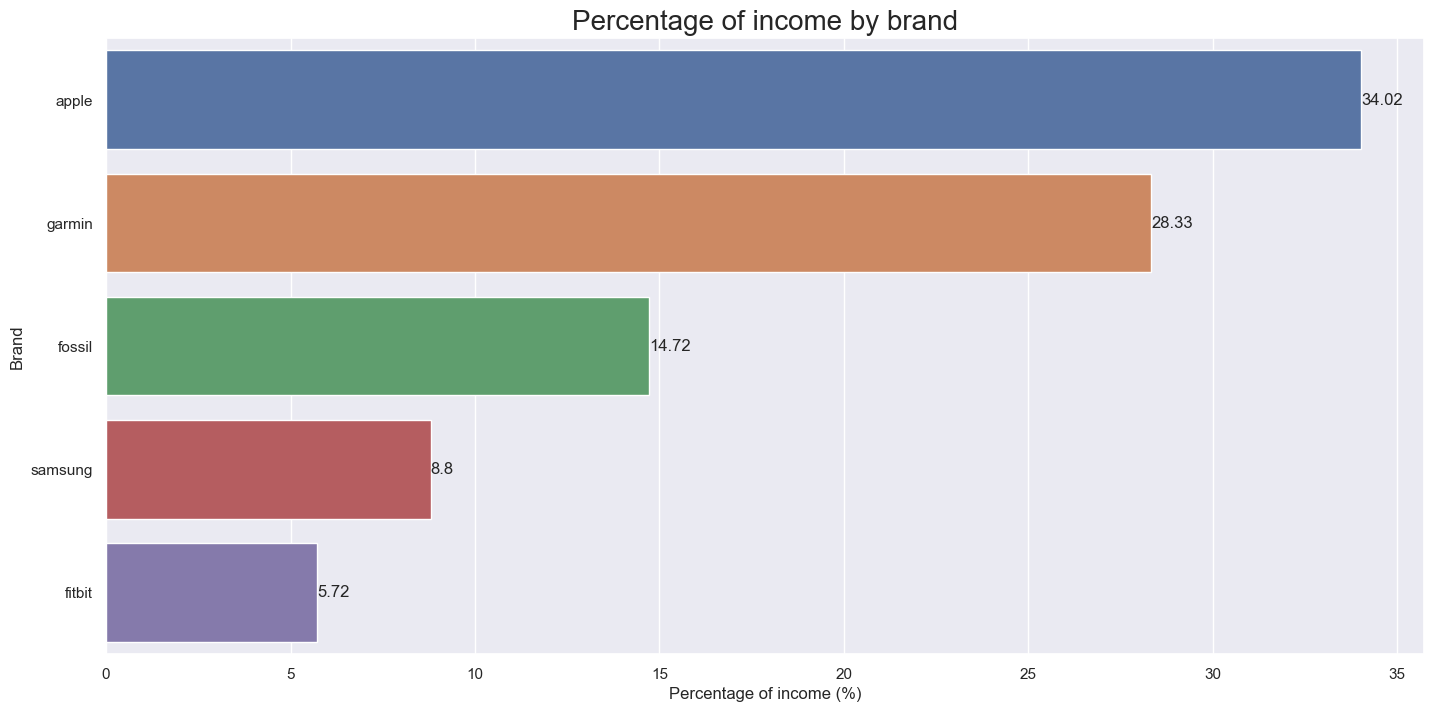

In [332]:
percentages = round(total_by_brand["Total Income"] * 100 / total_by_brand["Total Income"].sum(), 2)

total_by_brand["Income Percentage"] = percentages

sns.set(rc={'figure.figsize': (17, 8)})

perc_by_brand = sns.barplot(x="Income Percentage", y="brand", data=total_by_brand[0:5].reset_index())

perc_by_brand.set_title('Percentage of income by brand', fontsize=20);

perc_by_brand.set(xlabel="Percentage of income (%)", ylabel="Brand");

perc_by_brand.bar_label(perc_by_brand.containers[0]);


In [333]:
df_ratio.corr()

/var/folders/xk/5xcz5pg57111cdxrsknw5y8r0000gn/T/ipykernel_12649/1329016990.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ratio.corr()


,selling_price,original_price,rating,avg_battery_days,ratio,reviews
selling_price,1.000000,0.982482,0.297304,0.142029,-0.452404,-0.371417
original_price,0.982482,1.000000,0.296131,0.189265,-0.461698,-0.420695
rating,0.297304,0.296131,1.000000,-0.162465,-0.198985,0.104887
avg_battery_days,0.142029,0.189265,-0.162465,1.000000,0.276965,-0.140554
ratio,-0.452404,-0.461698,-0.198985,0.276965,1.000000,0.194554
reviews,-0.371417,-0.420695,0.104887,-0.140554,0.194554,1.000000


Using the corr() method alone gives us the correlation between numeric variables. However, we have several qualitative variables that can be very useful, such as brand, type, or model. We will factorize them, save the labels to reverse the factorization later, and calculate the correlations again.

In [334]:
quantitative_data = df_ratio.copy()

quantitative_data[["brand", "type", "model", "color", "display", "strap_material"]] = df_ratio[["brand", "type", "model", "color", "display", "strap_material"]].apply(lambda x: pd.factorize(x)[0])
labels = df_ratio[["brand", "type", "model", "color", "display", "strap_material"]].apply(lambda x: pd.factorize(x)[1])

correlation_data = quantitative_data.corr(method='pearson', min_periods=1)
correlation_data


,brand,type,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,ratio,reviews
brand,1.000000,0.606978,0.627144,0.312420,0.432939,0.434886,0.134827,0.160672,0.335063,0.008626,-0.419792,-0.287679
type,0.606978,1.000000,0.488786,0.218951,0.327010,0.345463,-0.109797,0.133344,0.247545,0.063692,-0.456978,-0.522342
model,0.627144,0.488786,1.000000,0.282345,0.544315,0.556900,0.221785,0.139043,0.258810,0.126175,-0.439511,-0.450750
color,0.312420,0.218951,0.282345,1.000000,0.265548,0.287825,0.030147,0.151256,0.128702,0.072632,-0.174571,0.109089
selling_price,0.432939,0.327010,0.544315,0.265548,1.000000,0.982482,0.459337,0.297304,0.401901,0.142029,-0.452404,-0.371417
original_price,0.434886,0.345463,0.556900,0.287825,0.982482,1.000000,0.415438,0.296131,0.384539,0.189265,-0.461698,-0.420695
display,0.134827,-0.109797,0.221785,0.030147,0.459337,0.415438,1.000000,0.238129,0.491210,-0.368516,-0.149105,0.411249
rating,0.160672,0.133344,0.139043,0.151256,0.297304,0.296131,0.238129,1.000000,0.267584,-0.162465,-0.198985,0.104887
strap_material,0.335063,0.247545,0.258810,0.128702,0.401901,0.384539,0.491210,0.267584,1.000000,-0.357088,-0.392690,-0.260890
avg_battery_days,0.008626,0.063692,0.126175,0.072632,0.142029,0.189265,-0.368516,-0.162465,-0.357088,1.000000,0.276965,-0.140554


Text(0.5, 1.0, 'Correlation Between Variables')

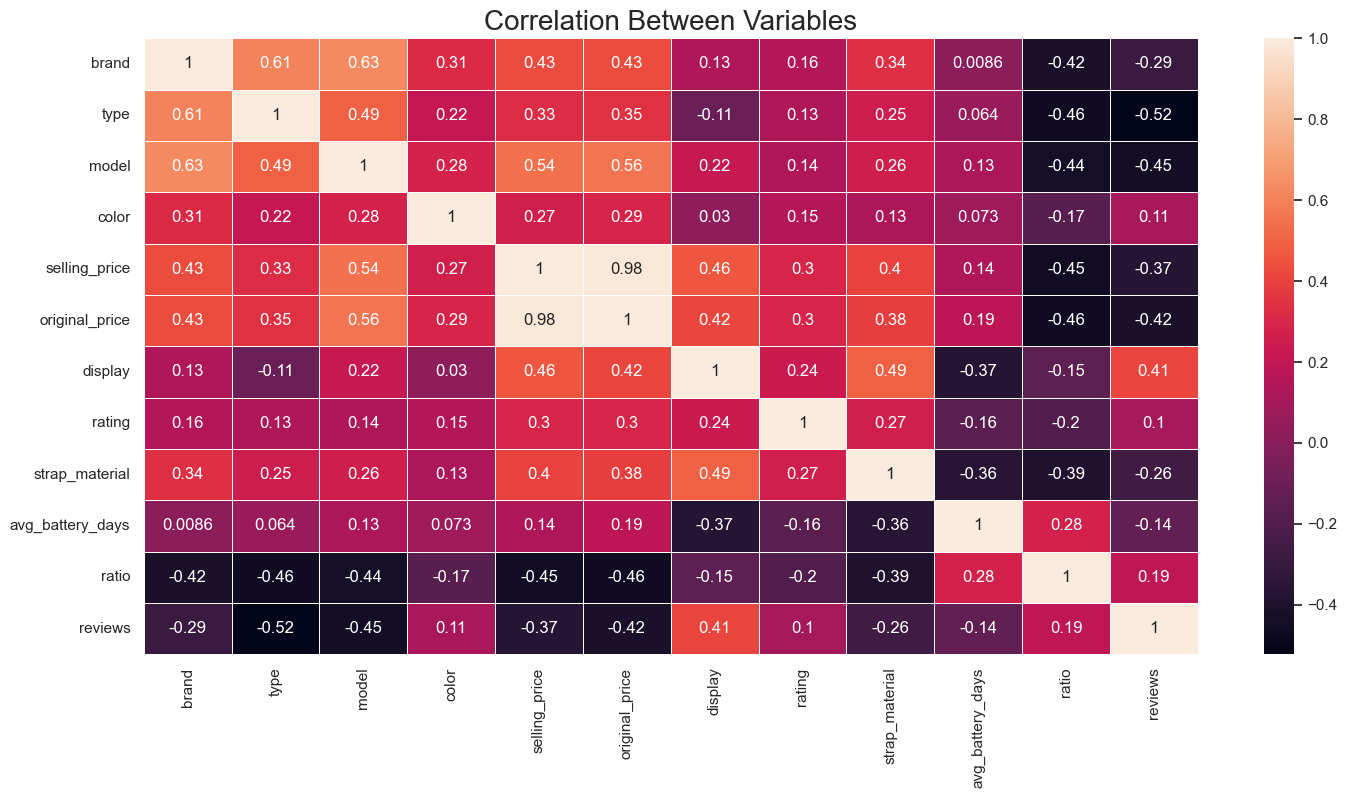

In [335]:
corr_heatmap = sns.heatmap(correlation_data, linewidths=.5, annot=True)

corr_heatmap.set_title('Correlation Between Variables', fontsize=20)


-  Commenting on the correlation results in English

- The high correlation between selling_price and original_price is trivial and will not be considered. The same goes for brand and model.

-  There is a positive correlation between brand and type. This indicates that sales based on the type of device are associated with each brand.

- It is not surprising that the model is related to original_price, and to a lesser extent to selling_price, which depends on the offer under which the transaction took place.

-  The color is barely related to the other variables, although it is true that if it were broken down in detail, it could be found that certain colors are more expensive than others.

- There is some correlation between the type of display, prices, strap_material, and reviews.

- As already checked in previous sections, type is also related to reviews.

- The ratio has very similar correlations to selling_price but in the negative direction.

-  It is logical that avg_battery_days has some correlation with display since certain types of screens consume more than others.

-  Finally, it is interesting to note the existence of a certain correlation between display and strap_material. It seems that there may be many cases where they go hand in hand.


In the first place, we will create a list with the brands ordered by the median of selling_price, to sort the boxplot accordingly.

In [336]:
median_index = df[["brand", "selling_price"]].groupby("brand").median().sort_values(by=["selling_price"], ascending = False).index

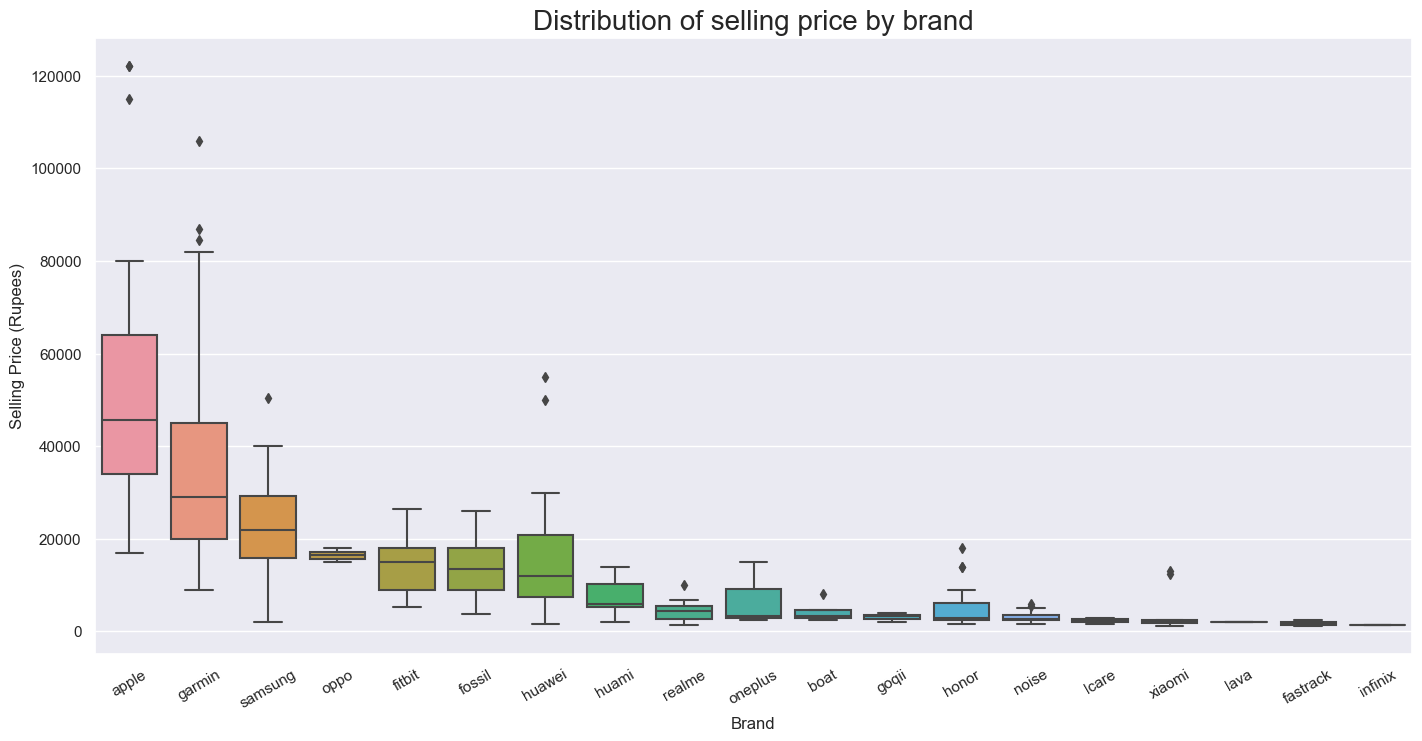

In [337]:
from matplotlib import pyplot as plt

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(17,8)})
bp = sns.boxplot(x = df["brand"], y = df["selling_price"], order = median_index)
bp.set_xticklabels(labels=median_index, rotation=30)
bp.set_title('Distribution of selling price by brand', fontsize = 20)
bp.set(xlabel="Brand", ylabel = "Selling Price (Rupees)")
plt.show()


Based on the information from this graph, we can divide the brands into three groups:

High price: Apple, Garmin, and Samsung. All three brands show significant variance.
Medium price: Oppo, Fitbit, Fossil, and Huawei. It's worth noting that Huawei has a variance that stands out in this group, offering some high prices and in other cases, reaching lower ones. The variance for Oppo is very small. The products from this brand in our dataset have a similar price.
Low price: the rest.

In [272]:
# Convert relevant columns to numeric if they are not already
df["avg_battery_days"] = pd.to_numeric(df["avg_battery_days"], errors='coerce')
df["selling_price"] = pd.to_numeric(df["selling_price"], errors='coerce')

# Calculate the ratio duration to price
ratio_duration_price = list(df["avg_battery_days"] * 1000 / df["selling_price"])

# Create a copy of the original DataFrame
df_ratio = df.copy()

# Insert the new ratio column into the DataFrame
df_ratio.insert(10, "ratio", ratio_duration_price, allow_duplicates=True)

# Display the head of the DataFrame
df_ratio.head()

,brand,type,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,ratio,reviews
0,xiaomi,FitnessBand,Smart Band 5,black,2499,2999,AMOLED Display,4.1,thermoplastic polyurethane,14,5.602241,NaN
1,xiaomi,FitnessBand,Smart Band 4,black,2099,2499,AMOLED Display,4.2,thermoplastic polyurethane,14,6.669843,NaN
2,xiaomi,FitnessBand,HMSH01GE,black,1722,2099,LCD Display,3.5,leather,14,8.130081,NaN
3,xiaomi,FitnessBand,Smart Band 5,black,2469,2999,AMOLED Display,4.1,thermoplastic polyurethane,14,5.670312,NaN
4,xiaomi,FitnessBand,Band 3,black,1799,2199,OLED Display,4.3,plastic,7,3.891051,NaN


## Let's visualize this data using a heatmap

## Boxplot

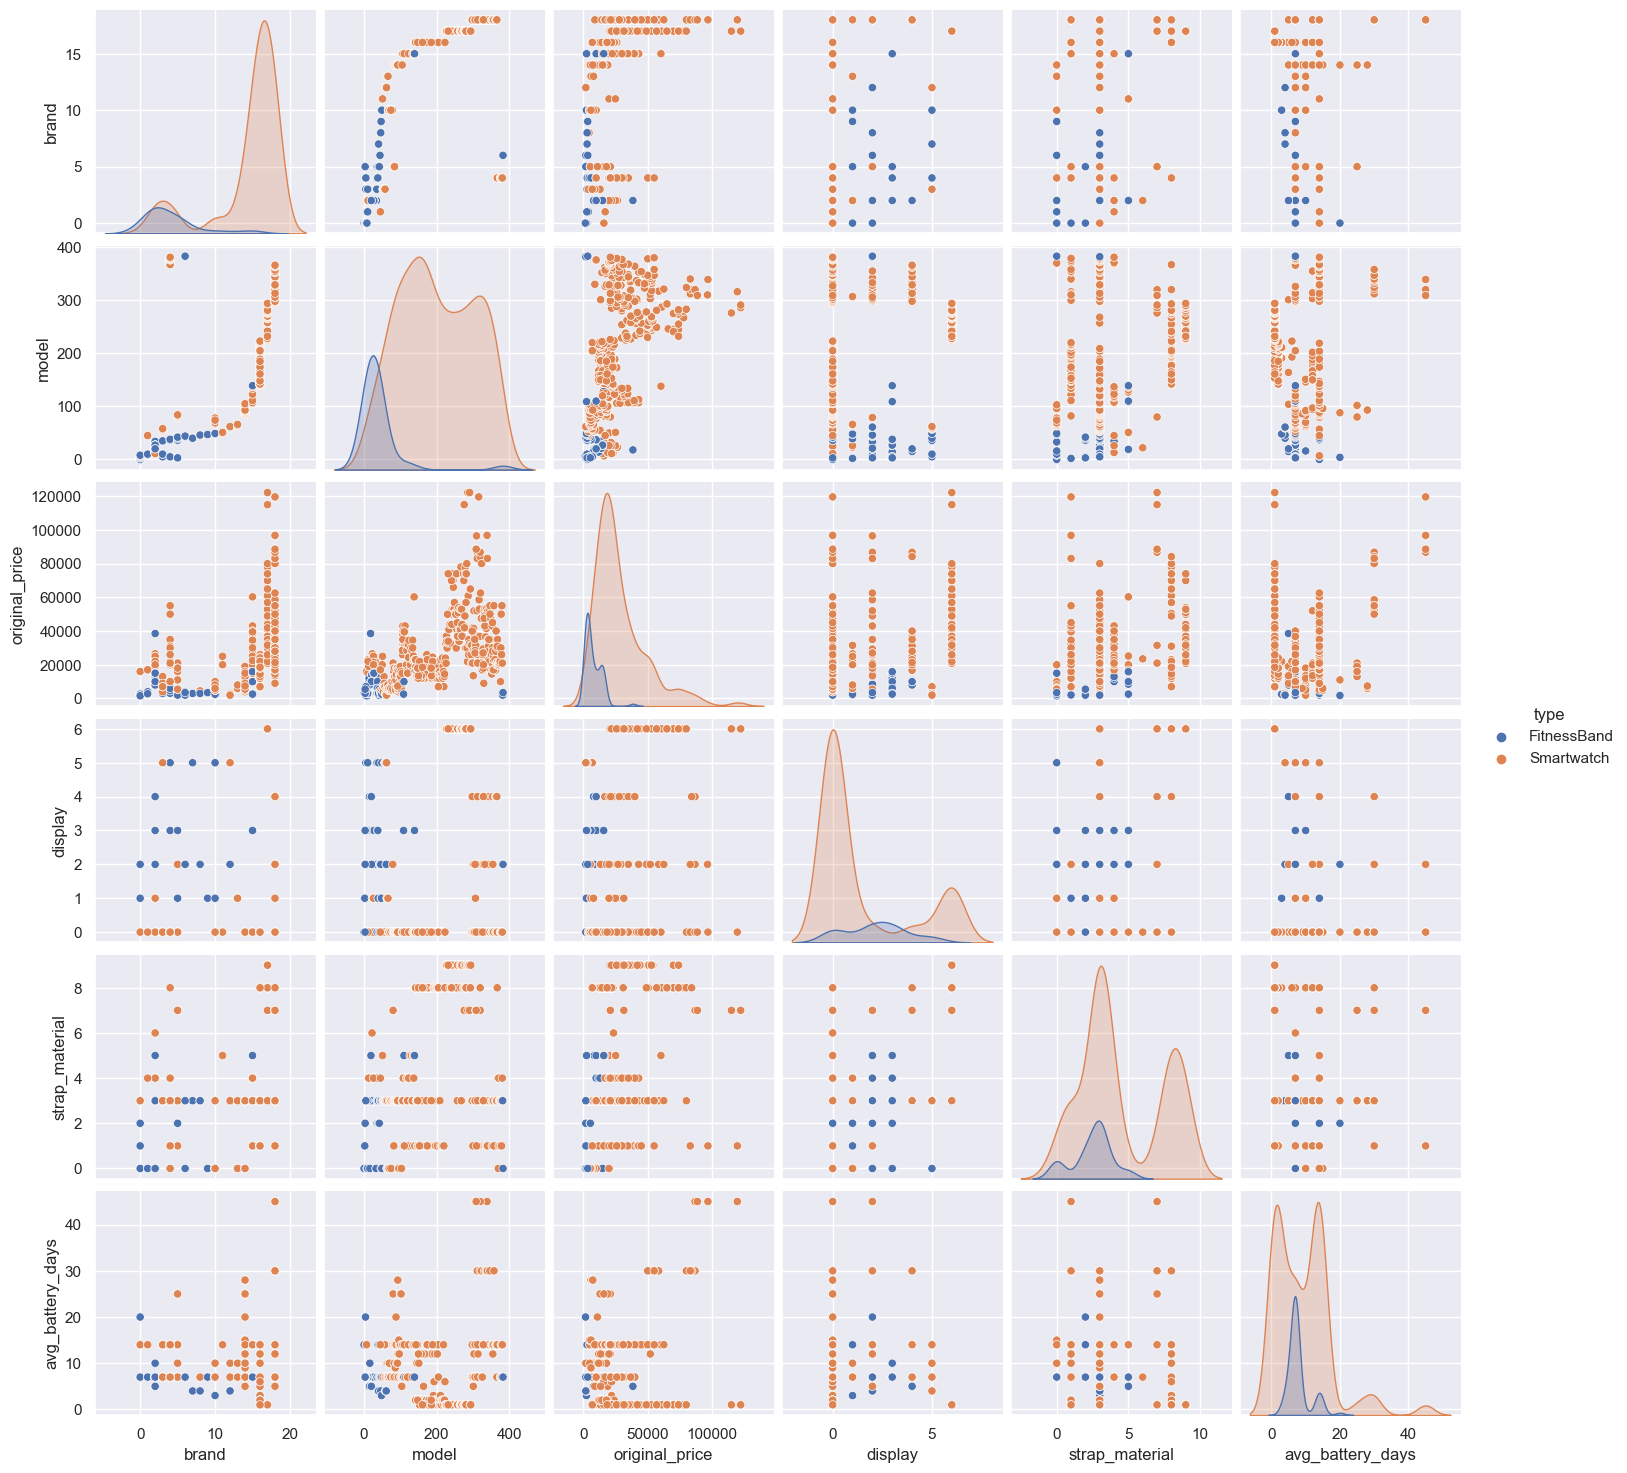

In [388]:
df_count_dt = quantitative_data.copy()

df_count_dt["type"] = df["type"]

pp = sns.pairplot(df_count_dt[["brand", "type", "model", "original_price", "display", "strap_material", "avg_battery_days"]], hue="type")


In this pairgrid, the variables of interest found in section 7 are visualized against other relevant variables. Notably, 'type' is represented by color rather than another row and column.

In the scatter plots, the relationship between 'brand' and 'model' and between 'brand' and 'original_price' is more evident. The relationship between 'model' and 'original_price' is as expected. Exploring the relationship of 'type' with the other variables is facilitated by examining the distribution plots on the diagonal.

It can be observed, for example, that there are two types of brands: those that have sold both types of devices and those that predominantly focus on Smartwatches.

As anticipated earlier, the price of FitnessBands is in the lower range compared to Smartwatches, even lower for minimum prices. FitnessBands are generally much more affordable than Smartwatches.

Regarding the display, it appears to have little correlation with 'type.'

It is evident that the strap material used in FitnessBands coincides with that of the majority of Smartwatches.

Finally, it is observed that the battery life of FitnessBands is quite short, ranging from 3 to 14 days, with 7 days being predominant. Smartwatches have a polarized distribution, with either very few days or 14 days, and there are some that go beyond two weeks.

I was particularly struck by the clear grouping of the distributions for the features:

Display: [0,2] and [3,6] (Only for Smartwatches)
Strap_material: [0,5] and [6,10]
Avg_battery_days: [1,7], [8,14], and [15,45]


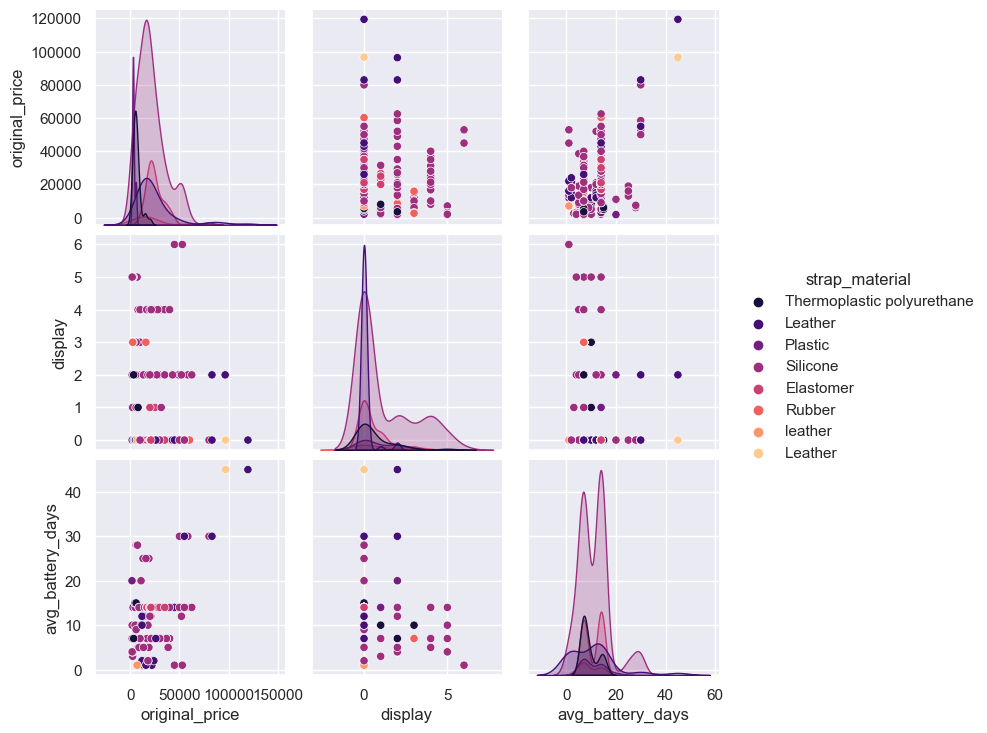

In [391]:
data_count_strap = quantitative_data.copy()

data_count_strap["strap_material"] = df["strap_material"]

pp_sm1 = sns.pairplot(data_count_strap[["original_price", "display", "strap_material", "avg_battery_days"]].loc[quantitative_data["strap_material"] <= 5], hue="strap_material", palette="magma")


For this group, overall, the prices remain in the mid-low range, with silicone being slightly more expensive. Let's take a look at the group on the right.

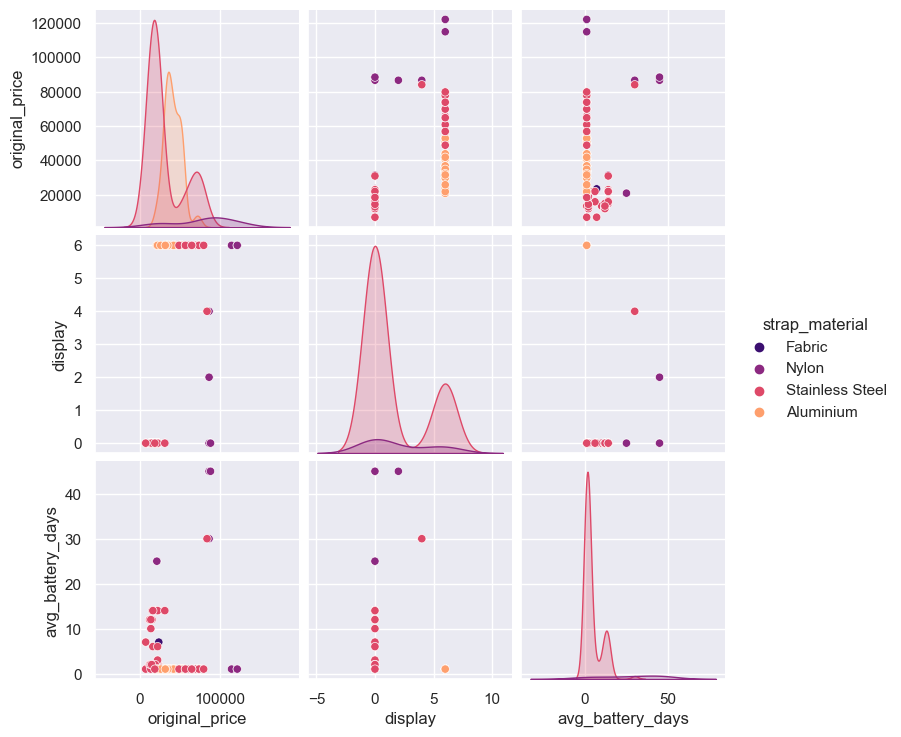

In [364]:
pp_sm2 = sns.pairplot(data_count_strap[["original_price", "display", "strap_material", "avg_battery_days"]].loc[quantitative_data["strap_material"] > 5], hue="strap_material", palette="magma")


The trackers with the most expensive straps are nylon ones, and there are few of them.

In [ ]:
df.loc[data_count_strap["strap_material"]=="nylon"]

,brand,type,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,reviews
132,honor,Smartwatch,GS Pro,black,NaN,"20,999",AMOLED Display,4.4,nylon,25,215
133,honor,Smartwatch,GS Pro,blue,NaN,"20,999",AMOLED Display,4.4,nylon,25,215
419,apple,Smartwatch,42 mm White Ceramic Case with Cloud Sport,cloud,NaN,"1,14,900",OLED Retina Display,4.7,nylon,1,NaN
430,apple,Smartwatch,Series 3 GPS + Cellular- 42 mm Gray Ceramic Case,black,NaN,"1,22,090",OLED Retina Display,4.6,nylon,1,NaN
435,apple,Smartwatch,Series 3 GPS + Cellular- 42 mm White Ceramic Case,black,NaN,"1,22,090",OLED Retina Display,4.6,nylon,1,NaN
454,garmin,Smartwatch,Vivomove Style,"white, pink",NaN,"31,490",AMOLED Display,3.3,nylon,14,NaN
455,garmin,Smartwatch,Fenix 6 Pro Solar,"grey, black",NaN,"88,490",AMOLED Display,NaN,nylon,45,NaN
456,garmin,Smartwatch,Fenix 6X,"black, orange, red",NaN,"88,490",AMOLED Display,NaN,nylon,45,NaN
458,garmin,Smartwatch,Fenix 6,"black, red, orange",NaN,"86,690",LED Display,NaN,nylon,30,NaN
464,garmin,Smartwatch,Fenix 6,"grey, blue",NaN,"86,690",OLED Display,NaN,nylon,45,NaN


Trackers with nylon straps are all high-end Smartwatches from Garmin, Apple, and Honor.

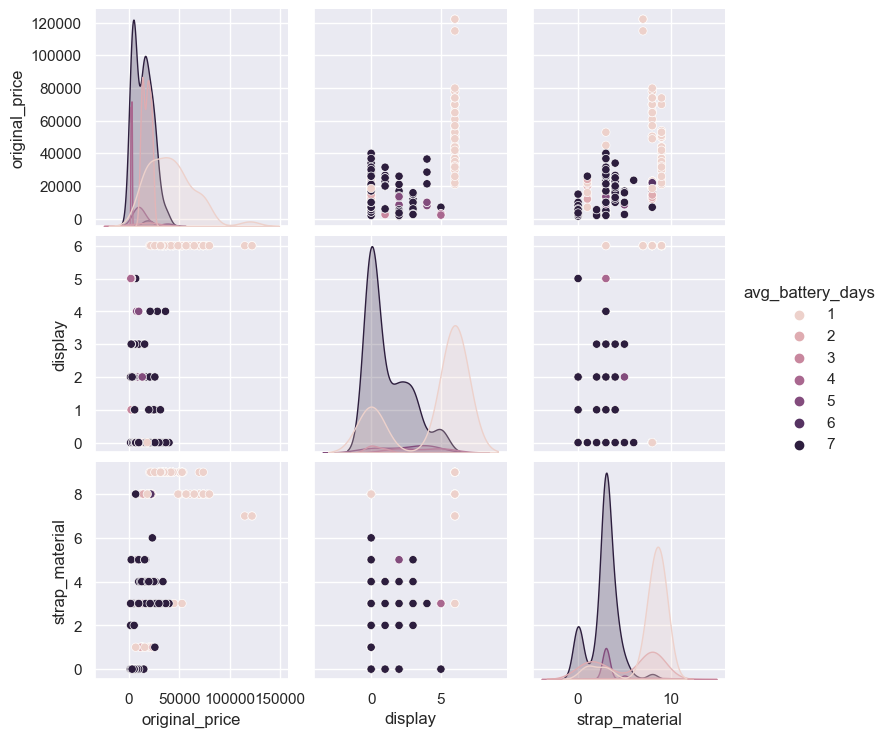

In [365]:
pp_bat1 = sns.pairplot(quantitative_data[["original_price", "display", "strap_material", "avg_battery_days"]].loc[quantitative_data["avg_battery_days"] <= 7], hue="avg_battery_days")


Generally, except for a couple of exceptions, a tracker with 7 days of battery life or less is cheap. There are some with only one day, presumably Smartwatches, that are very expensive.

In [366]:
list(set(df.loc[(quantitative_data["avg_battery_days"] <= 7) & (quantitative_data["display"] == 6)]["brand"]))

['apple']

Smartwatches that need to be charged daily are generally from the Apple brand.

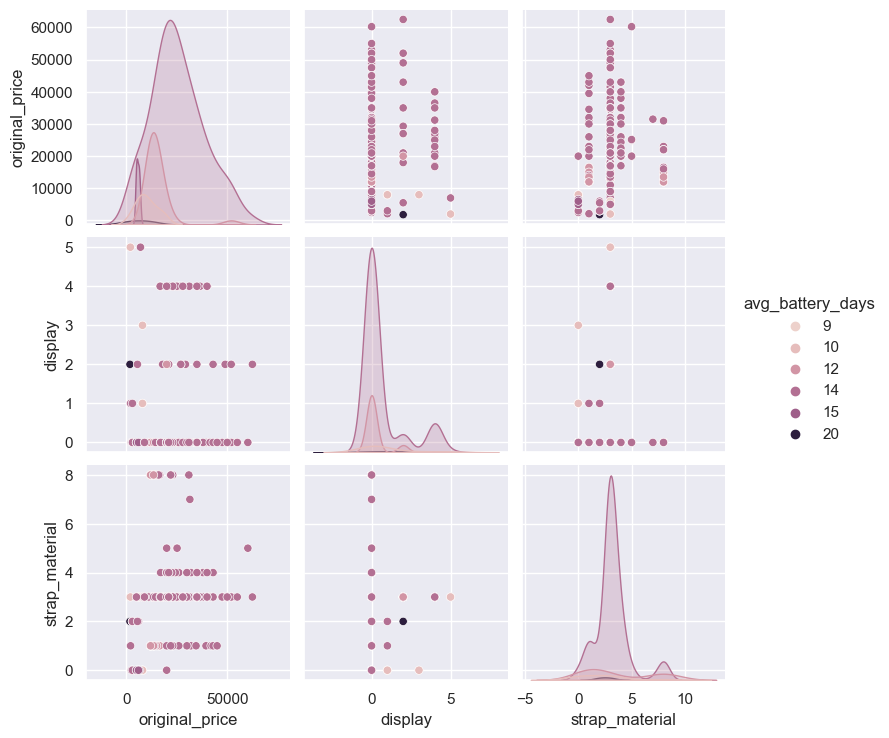

In [367]:
pp_bat1 = sns.pairplot(quantitative_data[["original_price", "display", "strap_material", "avg_battery_days"]].loc[quantitative_data["avg_battery_days"].between(8, 20)], hue="avg_battery_days")


The trackers with a battery life between 7 and 20 days mostly have 14 days, and the price for the majority is around 35,000 Rupees. This battery life can be a significant indicator of a mid-price range

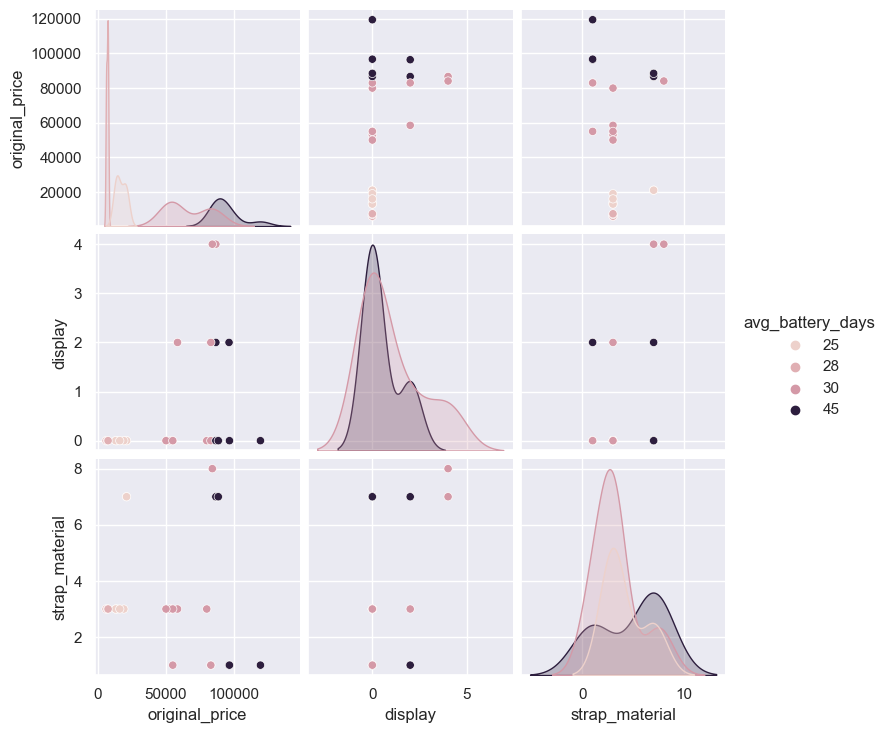

In [368]:
pp_bat1 = sns.pairplot(quantitative_data[["original_price", "display", "strap_material", "avg_battery_days"]].loc[quantitative_data["avg_battery_days"] > 20], hue="avg_battery_days")


A tracker in our dataset that has 28 days or more of battery life will cost 50,000 rupees or more.

Note that the OLED Retina Display has not been obtained in the graphs for battery durations greater than 7 days. Therefore, the inference from the first graph becomes a conclusion: the average battery life of Apple Smartwatches is 1 day

## Conclusion 
- A Fitness Tracker is typically acquired with a specific goal in mind, often involving the continuous recording of physical activity for subsequent analysis. Some individuals may seek a device solely for digital timekeeping, whether affordable or luxurious. Within the realm of physical activity, there are those who aim to monitor only daily steps, others who wish to record workout sessions, and some who desire a more detailed analysis, especially for competitive purposes.

- The division between Fitness Bands and Smartwatches seems somewhat polarized. Generally, individuals seek step tracking and sometimes intense activity monitoring in Fitness Bands, activities that do not rapidly deplete the battery. On the other hand, Smartwatches are sought for their smartphone-like functionality (which can also record activities, but their features consume battery more quickly). This dataset does not include devices designed for the moderate athlete (e.g., Polar, Suunto watches, etc.) who pursues specific goals without needing typical smartphone functionalities.

- As these are Fitness Trackers, it would be interesting to cross-reference this data with information about the type of heart rate monitoring device (chest strap or wrist), GPS capabilities, sleep tracking, power meter, and battery capacity, among others. This additional information would contribute to a more precise understanding of the trackers.

- Smartwatches have outsold Fitness Bands by a significant margin (86.7% versus 13.3%), with more devices priced below the mean than above it. Smartwatches, in general, are more expensive than Fitness Bands. Not only are they pricier, but their prices also exhibit greater variability, suggesting that, in addition to higher quality, they offer a broader range of features compared to Fitness Bands.

- Fitness Bands have a higher battery-to-price ratio than Smartwatches due to the lower prices of the former and the high power consumption of the latter's features. Xiaomi stands out as the leading brand in this regard. Battery life varies significantly among Smartwatches, with a standard deviation of over 8 days compared to 3 days for Fitness Bands. This variation likely stems from the existence of Smartwatches with very long battery life (e.g., Garmin, up to 45 days) and others with short durations (e.g., Apple, maximum 1 day).

- Tracker ratings, in general, are generous. Smartwatches tend to receive slightly better ratings than Fitness Bands, especially those priced above the mean. According to our dataset, the top revenue-generating brands are Apple, Garmin, Samsung, Fossil, and Fitbit. Regarding review availability, very few items have reviews, and 83.3% of the available information belongs to Smartwatches priced below the mean. However, users seem to write significantly more reviews for Fitness Bands, surpassing the number of reviews for Smartwatches by a considerable margin.

- Lastly, display technologies and manufacturing materials significantly impact the selling price. Trackers with LED technology tend to be the cheapest, while AMOLED displays are the most common. The OLED Retina Display from Apple is the most expensive. Generally, Trackers with Nylon straps are the priciest. For a mid-range price, a good option is a Tracker with a TFT-LCD display and a silicone strap. Alternatively, considering battery life, a Tracker with around 14 days of battery life is a suitable choice.






